In [1]:
from __future__ import absolute_import, division, print_function

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pickle
import seaborn as sns

In [2]:
matplotlib.rcParams.update({'font.size': 18})

In [3]:
adj_list = pickle.load(open('data/processed_data/adj_list', 'rb'))
idx_to_county = pickle.load(open('data/processed_data/idx_to_county', 'rb'))

# Degree Distributions

In [4]:
degrees = []
for k, v in adj_list.items():
    degrees.append(len(v))

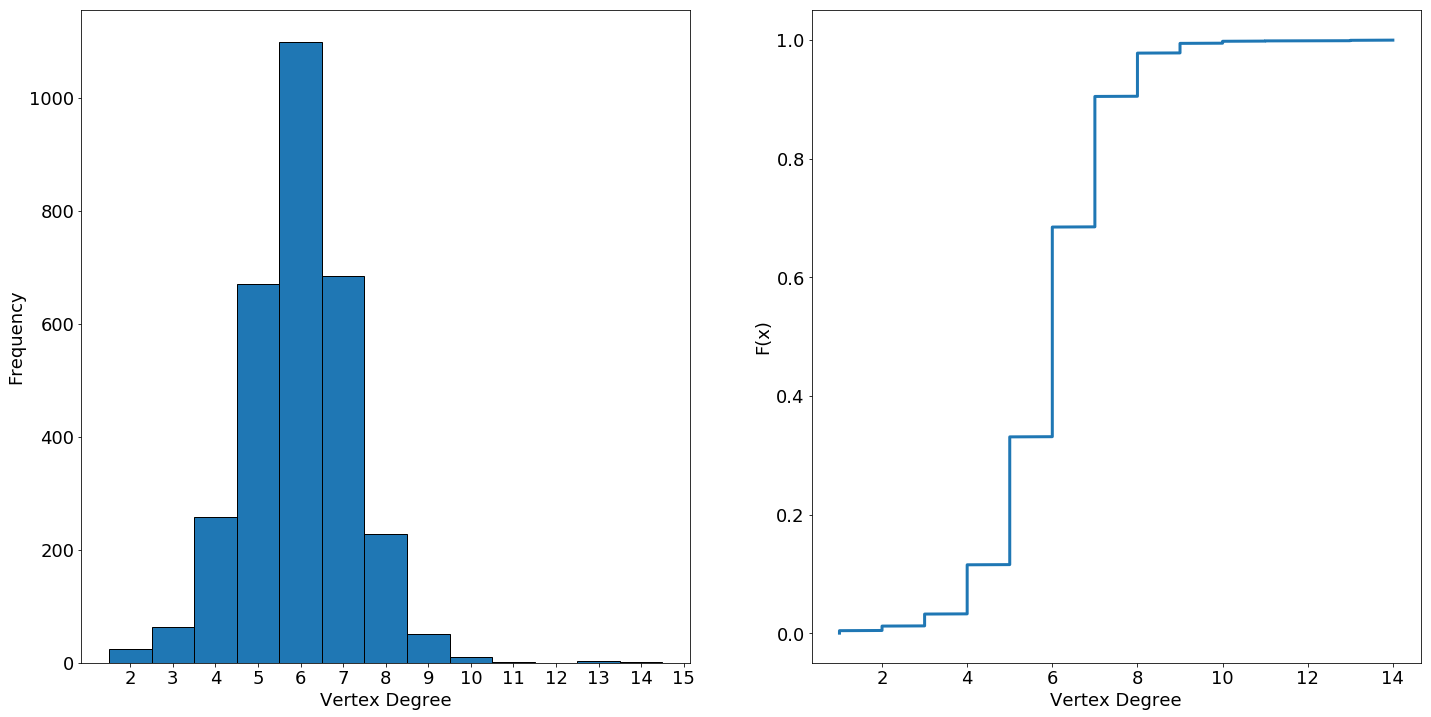

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 12))

bins = np.arange(2, np.max(degrees) + 1.5) - 0.5
ax1.hist(degrees, bins, edgecolor='black')
ax1.set_xticks(bins + 0.5)
ax1.set_xlabel('Vertex Degree')
ax1.set_ylabel('Frequency')

ax2.plot(np.sort(degrees), np.arange(1, len(degrees) + 1) / float(len(degrees)), linewidth=3)
ax2.set_xlabel('Vertex Degree')
ax2.set_ylabel('F(x)')

plt.show()
#plt.savefig('degree_dist.pdf')

In [6]:
degrees_by_state = {}
for k, v in adj_list.items():
    county = idx_to_county[k]
    state = county.split(',')[-1].strip()
    if state in degrees_by_state:
        degrees_by_state[state].append(len(v))
    else:
        degrees_by_state[state] = [len(v)]

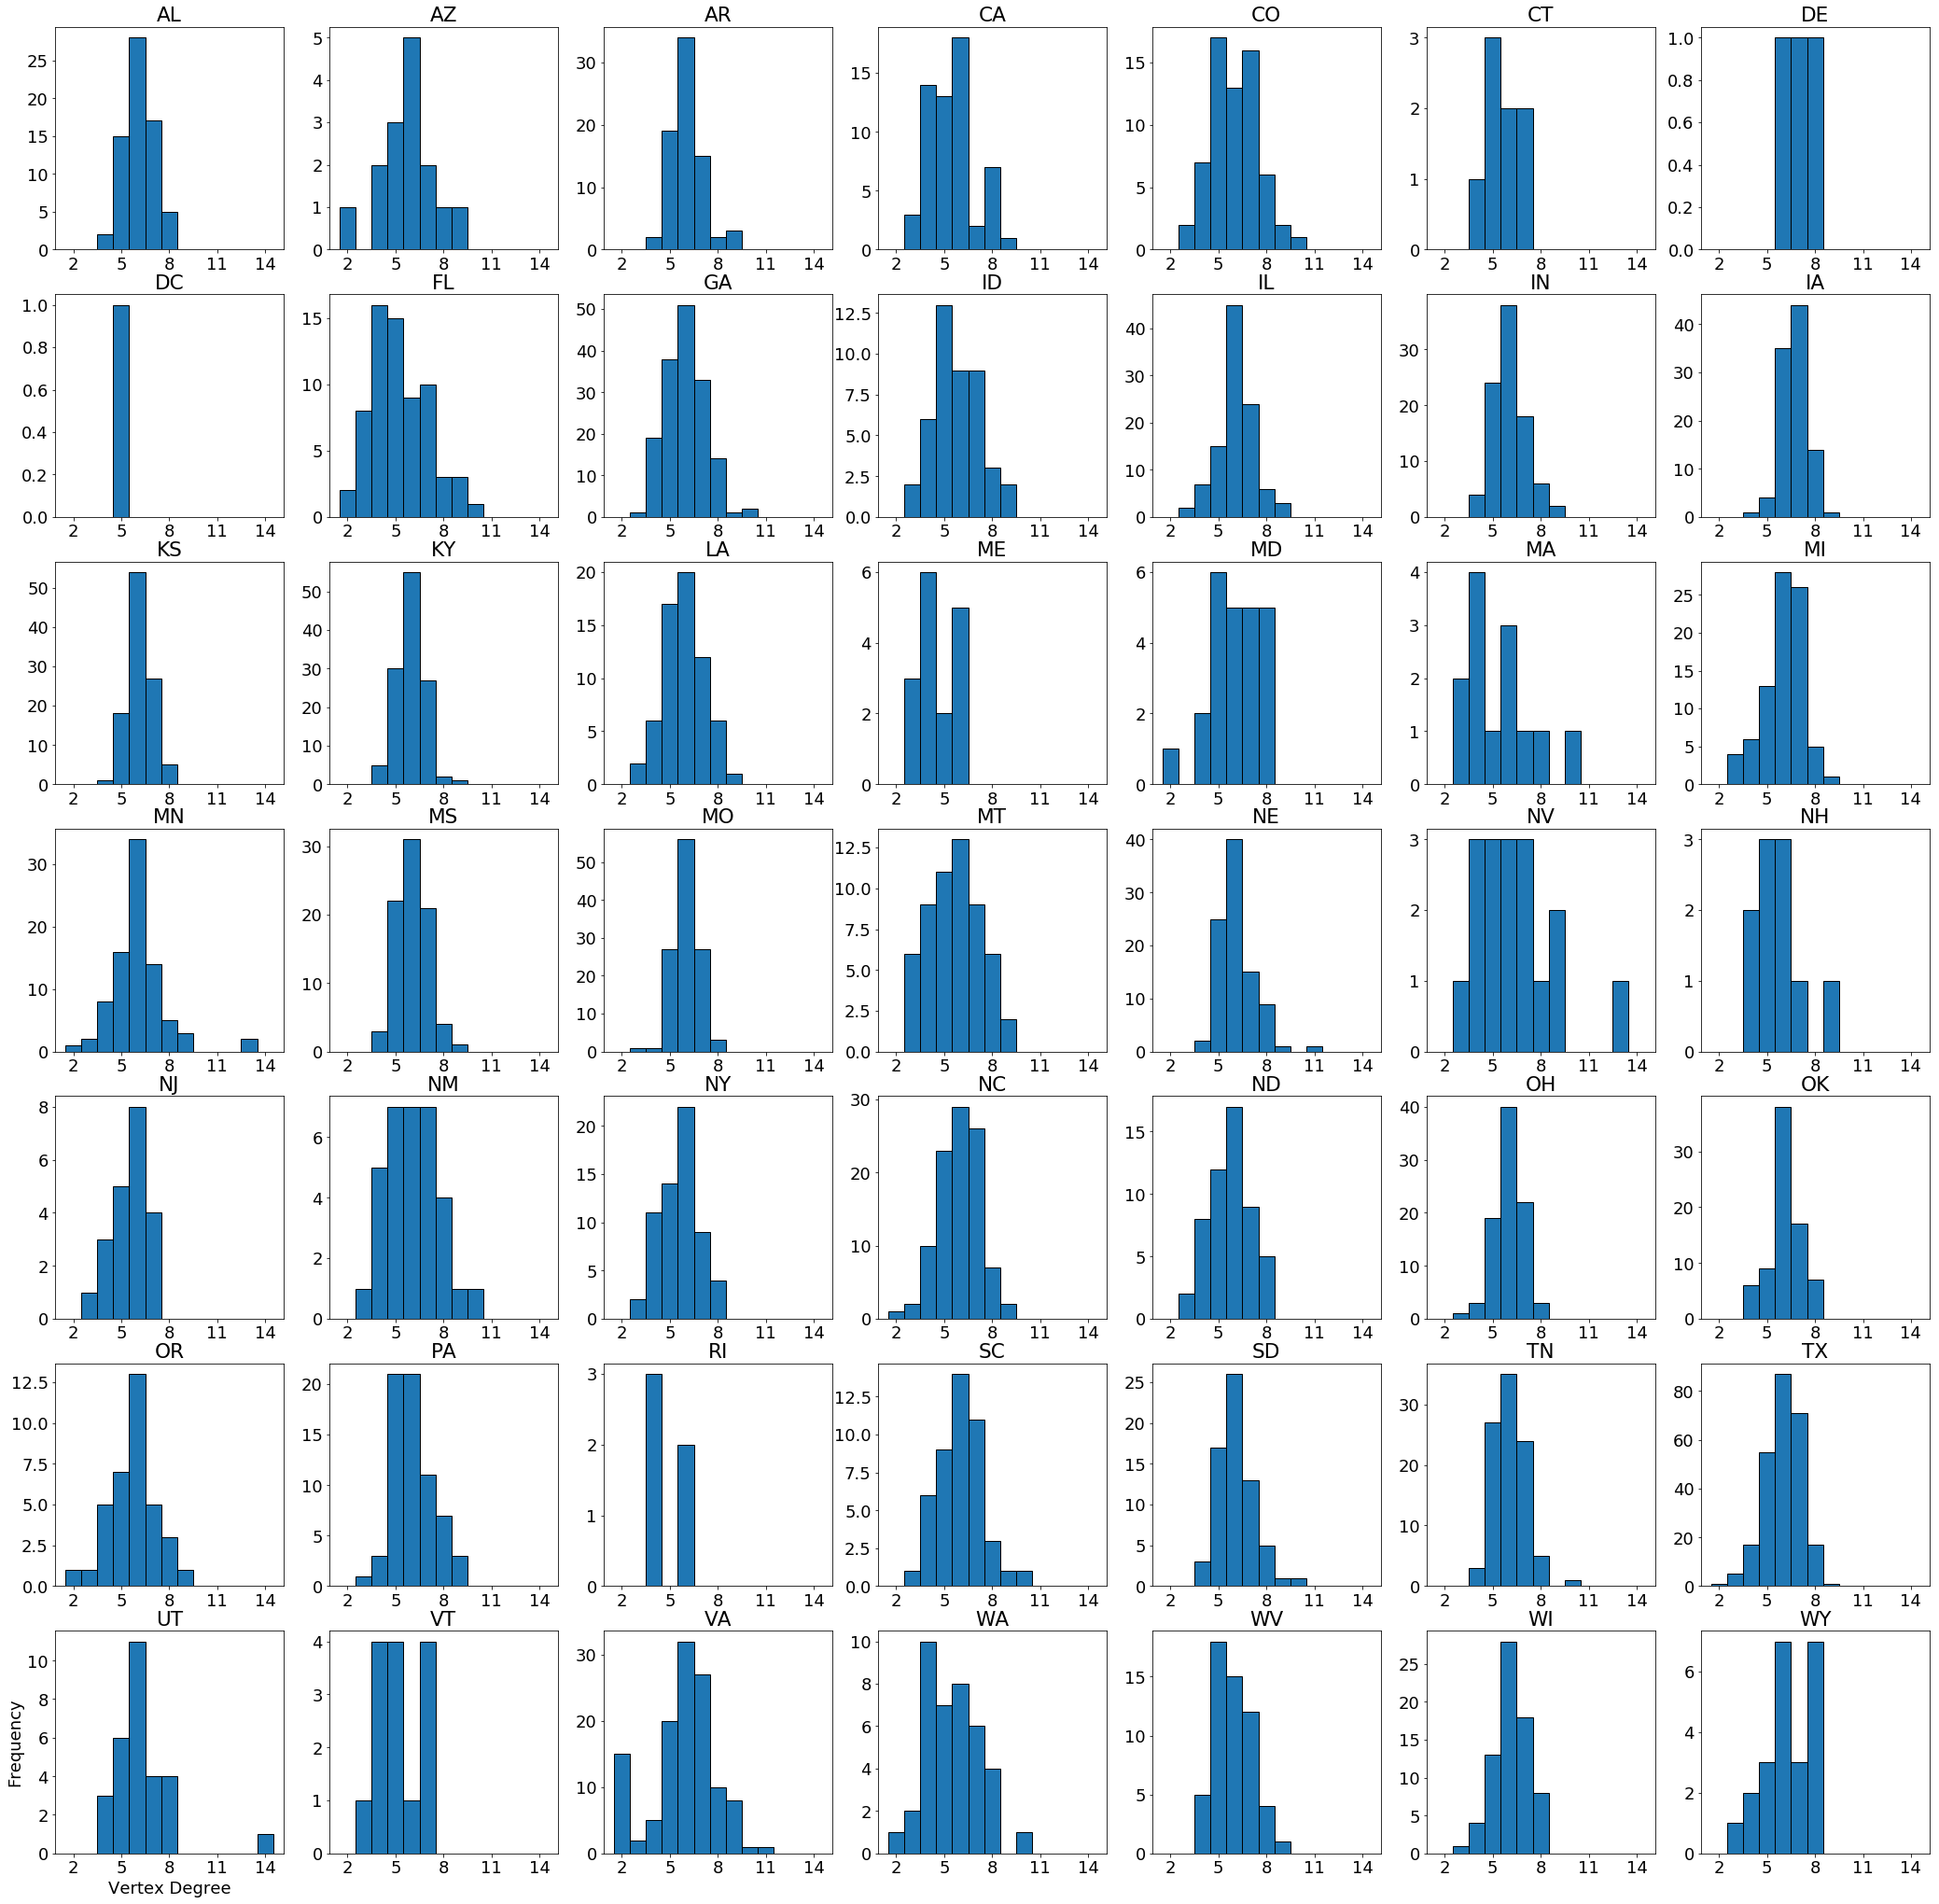

In [7]:
num_cols = 7
fig, axes = plt.subplots(num_cols, num_cols, figsize=(36, 36))
bins = np.arange(2, np.max(degrees) + 1.5) - 0.5
i = 0
for k, v in degrees_by_state.items():
    row = i // num_cols
    col = i % num_cols
    axes[row, col].hist(v, bins, edgecolor='black')
    axes[row, col].set_title(k)
    axes[row, col].set_xticks(bins[::3] + 0.5)
    i += 1
axes[6, 0].set_xlabel('Vertex Degree')
axes[6, 0].set_ylabel('Frequency')
plt.show()

## List the states with the least/most neighbors on average

In [8]:
state_avg_degrees = []
for k, v in degrees_by_state.items():
    state_avg_degrees.append(np.mean(v))
sort_idxs = np.argsort(state_avg_degrees)
sorted_states = np.array(list(degrees_by_state.keys()))[sort_idxs]
sorted_avg_degrees = np.array(state_avg_degrees)[sort_idxs]
print('States with lowest average county degree')
for v1, v2 in zip(sorted_states[:5], sorted_avg_degrees[:5]):
    print(v1, v2)
print('\nStates with highest average county degree')
for v1, v2 in zip(sorted_states[-5:], sorted_avg_degrees[-5:]):
    print(v1, v2)

States with lowest average county degree
ME 4.5625
RI 4.8
DC 5.0
MA 5.071428571428571
VT 5.214285714285714

States with highest average county degree
UT 6.275862068965517
WY 6.304347826086956
NV 6.352941176470588
IA 6.696969696969697
DE 7.0
